## Practical Session - Unsupervised Learning

This Practical session is about unsupervised learning. We will use the dimensionality reduction and clustering techniques presented this morning to analyze toy examples, recognize faces and segment skin lesion images.

You have two weeks (18/04) to update a small report (2 jupyter notebooks + theoretical questions) to the *site pédagogique* of IMA205 under the section *Reports-TP*. You can answer in French or English. The deadline is 23:59 of the 18th of April. I remind you that the report is mandatory and evaluated. 

**All reports uploaded after the deadline will not be evaluated, namely grade equal to 0**

In this jupyter notebook, you can play with the toy examples shown during the lecture. 

First let's load the functions we will use

In [0]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
plt.close('all')

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans

from scipy import linalg as LA
from scipy.stats import ortho_group

The next three functions are used to create the data and plot the results. Analyse them and try to understand what they do.

In [0]:
def generate_scenario(scenario=3, n_samples0 = 100, n_samples1 = 30):

    y = np.concatenate((np.zeros([n_samples0,1]) , np.ones([n_samples1,1])) , axis=0)

    if scenario == 1: 
        # Separate Gaussian
        mean0 = [2, 3]
        mean1 = [12, 14]
        cov0 = [[1, 1.5], [1.5 ,3]]
        cov1 = 2 ** 2 * np.eye(2)
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
    elif scenario == 2:
        # Overlapping Gaussian
        mean0 = [2, 3]
        mean1 = [5, 7]
        cov0 = [[1, 1.5], [1.5 ,3]]
        cov1 = [[2, 3], [3 ,6]]
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
        
    elif scenario == 3:
        # Overlapping Gaussian
        mean0 = [0, 0]
        mean1 = [0, 0]
        cov0 = [[50, 4], [4, 2]]
        cov1 = [[2, 0], [0 ,50]]
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
        
    elif scenario == 4:
        # Circles
        # 1 circle
        angle0=np.linspace(0, 2 * np.pi, n_samples0);
        X0=np.vstack((8*np.cos(angle0) , 8*np.sin(angle0))).T
        
        # 2 circle
        angle1=np.linspace(0, 2 * np.pi, n_samples1);
        X1=np.vstack((2*np.cos(angle1) , 2*np.sin(angle1))).T

    return X0,X1,y

def plotResults(X=None,U=None,Y=None,const=1,title=''):
    
    N0=np.sum(y==0)
    N1=np.sum(y==1)
    
    fig=plt.figure(figsize=(17, 6))
    
    ax  = fig.add_subplot(1, 3, 1)
    plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
    plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
    if U is not None:
        average=X.mean(axis=0)
        sd=LA.norm(X.std(axis=0))
        u0=U[:,0]*const*sd;
        u1=U[:,1]*const*sd;
        plt.plot([average[0]-u0[0], average[0]+u0[0]],[average[1]-u0[1], average[1]+u0[1]], c='g',linewidth=4, label='C 1' )
        plt.plot([average[0]-u1[0], average[0]+u1[0]],[average[1]-u1[1], average[1]+u1[1]], c='k',linewidth=4, label='C 2' )
        plt.title('Original data and components')
    else:
        plt.title('Original data')
    plt.legend()
    
    ax  = fig.add_subplot(1, 3, 2)
    plt.scatter(Y[np.where(y == 0)[0],0], np.zeros((N0,1)), c='r', s=3, marker='o', label='Class 0')
    plt.scatter(Y[np.where(y == 1)[0],0], np.zeros((N1,1)), c='b', s=3, marker='x', label='Class 1')
    ax.set_title(title + '\n Scores on 1st component')
    
    ax  = fig.add_subplot(1, 3, 3)
    plt.scatter(Y[np.where(y == 0)[0],1], np.zeros((N0,1)), c='r', s=3, marker='o', label='Class 0')
    plt.scatter(Y[np.where(y == 1)[0],1], np.zeros((N1,1)), c='b', s=3, marker='x', label='Class 1')
    plt.legend()
    plt.title('Scores on 2nd component')
    
    plt.show()
    
    
def frontiere(model, X, y, step=50):

    labels = np.unique(y)
 
    min_tot = np.min(X)
    max_tot = np.max(X)
    delta = (max_tot - min_tot) / step
    xx, yy = np.meshgrid(np.arange(min_tot, max_tot, delta),
                         np.arange(min_tot, max_tot, delta))
    z = np.array( model.predict(np.c_[xx.ravel(), yy.ravel() ]) )
    z = z.reshape(xx.shape)
   
    plt.imshow(z, origin='lower', extent=[min_tot, max_tot, min_tot, max_tot],
               interpolation="mitchell", cmap='RdBu')
    
    cbar = plt.colorbar(ticks=labels)
    cbar.ax.set_yticklabels(labels)

    plt.scatter(X[np.where(yKmeans == 0)[0],0],X[np.where(yKmeans == 0)[0],1],c='r', label='Predicted class 0')
    plt.scatter(X[np.where(yKmeans == 1)[0],0],X[np.where(yKmeans == 1)[0],1],c='b', label='Predicted class 1') 
    
    plt.ylim([min_tot, max_tot])
    plt.xlim([min_tot, max_tot])
    

Now,let's create the data we will use.
Try the 4 different scenarios.

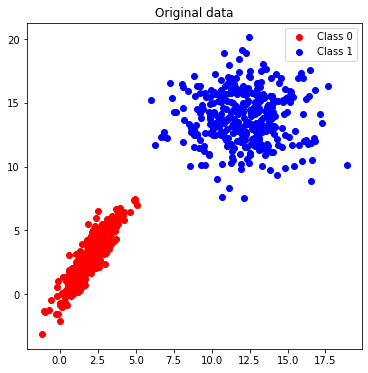

In [3]:
X0,X1,y = generate_scenario(scenario=1, n_samples0 = 350, n_samples1 = 350)
X=np.concatenate((X0,X1),axis=0)

plt.figure(figsize=(6, 6))
plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()
plt.show()

It's time to use the methods seen this morning. 

As you can see, we have generated two populations (class 0 and class 1). We concatenate them as a single matrix *X* which will be the input for all methods. In this way, the methods will be unaware of the class of the observations (unsupervised) and we will test whether the methods are appropriate for the analysed scenario and if they are able to use less dimensions to correctly distinguish the two classes. 

Let's start with PCA. 

**Question:** Use PCA with the different 4 scenarios and comment the results. When does PCA work well ? How can you undesrtand when it 'works well' ? What does it mean in your opinion?

[0.95945689 0.04054311]


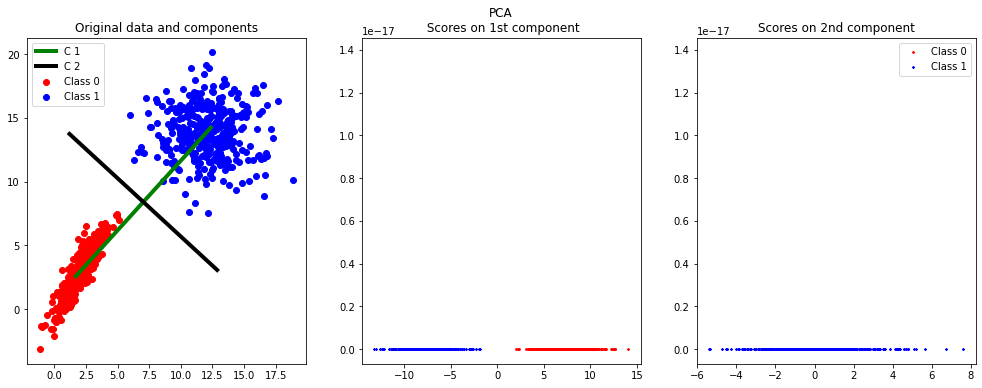

In [4]:
## PCA
pca = PCA(random_state=1)
Ypca=pca.fit_transform(X)
U=pca.components_.T # we want PC on columns
print(pca.explained_variance_ratio_)
plotResults(X,U,Ypca,const=1,title='PCA')

---

***Response :*** In the first scenario, we can easily separate the two clusters using the first component of PCA. It's not the case in the second case, because the two cluster are not separable.
In the third case, the two directions returned by PCA is not those that came to our mind naturally (and so the separation is not efficient). ICA would be preferable.
In the fourth case, the two direction are random, it could have returned every direction. We have to use the kernel trick to separate our data.

To me, "work well" mean that we can clearly identify the two cluster using only the first direction. We can reduce the dimension without losing any information.

---

Instead than using the scikit-learn implementation, implement one on your own !
Complete the code where you see **XXXXXXXXXXXXXX**

In [0]:
def pcaLecture(X):
    ''' 
    Inputs: 
            X: is a [Nxd] matrix. Every row is an observation and every
              column consists of features.
    Outputs:
            Y: is a [Nxd] matrix representing the scores, namely the 
            coordinates of X onto the new basis given by the eigenvactors U
            of the covariance matrix of X. Columns are the principal components.
               
            U: columns are Eigenvectors (sorted from the greatest to the lowest eigenvalue)
    
            D: Eigenvalues (sorted from the greatest to the lowest eigenvalue)
               
            var_explained: percentage of the original variability explained
            by each principal component.
    '''
    
    N=X.shape[0]
    Xc=X-np.mean(X,axis=0) # centering
    D2, Uh = LA.svd(Xc)[1:3] # computation of eigenvectors and eigenvalues using SVD
    U=Uh.T
    Y = np.dot(Xc,U) # computation of the scores
    D=D2**2/(N-1) # computation of the eigenvalues
    var_explained = [D[0]/np.sum(D),D[1]/np.sum(D)] # computation of explained variance
    return Y,U,D,var_explained

Test your own implementation

[[-6.36049263e+00 -4.79906462e-03]
 [-9.10273170e+00 -9.29699530e-01]
 [-1.01038859e+01 -6.85118860e-01]
 ...
 [ 8.25452287e+00  7.50376324e-01]
 [ 5.00942616e+00 -1.24625486e+00]
 [ 5.30280715e+00 -8.48960361e-01]]


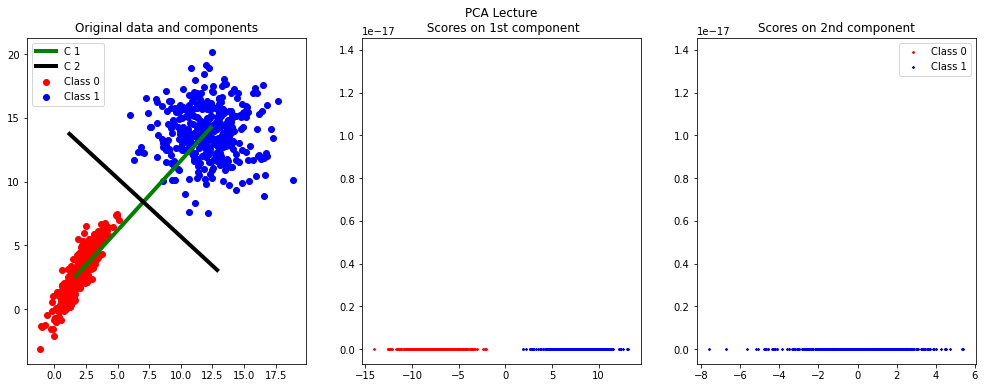

In [6]:
YpcaLec,UpcaLec,DpcaLec,var_explainedPcaLec=pcaLecture(X)
print(YpcaLec)
plotResults(X,UpcaLec,YpcaLec,const=1,title='PCA Lecture')

Let's use Kernel-PCA with the rbf kernel (you can also test other kernels if you want).

**Question:** Use Kernel-PCA with the different 4 scenarios and comment the results. When does K-PCA work well ? Why ?

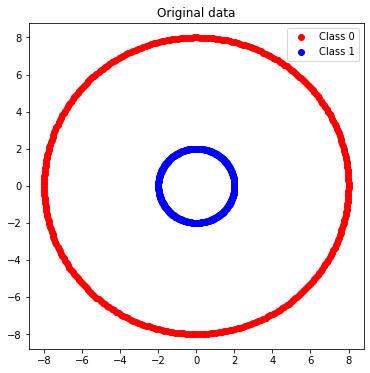

In [9]:
X0,X1,y = generate_scenario(scenario=4, n_samples0 = 350, n_samples1 = 350)
X=np.concatenate((X0,X1),axis=0)

plt.figure(figsize=(6, 6))
plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()
plt.show()

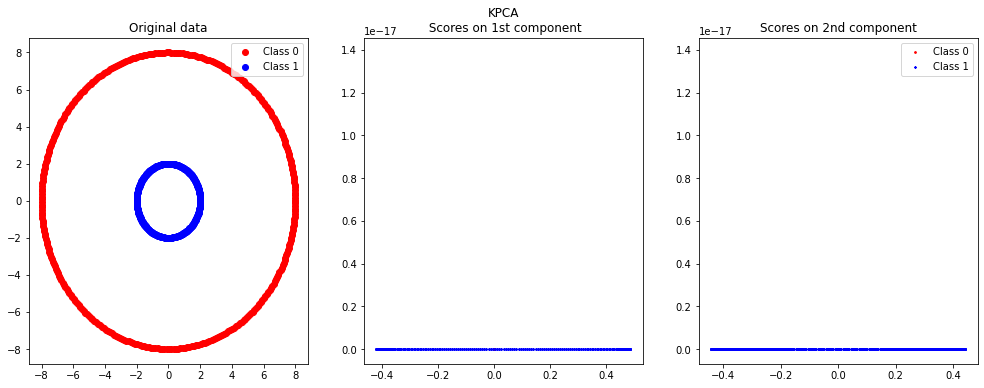

In [10]:
# Kernel-PCA
gamma=2
Kpca = KernelPCA(kernel='rbf', gamma=gamma, random_state=1)
YKpca=Kpca.fit_transform(X)
DKpca=Kpca.lambdas_
AKpca=Kpca.alphas_

plotResults(X=X,Y=YKpca,const=1,title='KPCA')

--- 

***Response :*** The K-PCA works well on the 4th scenario (concentric sources) because the gaussian kernel enable to clearly separates the two clusters in this case.

---

Instead than using the scikit-learn implementation, implement one on your own !
Complete the code where you see **XXXXXXXXXXXXXX**

In [0]:
def euclidean_distance(v1, v2):
    d = 0.0
    for i in range(len(v1)):
        d += (v1[i] - v2[i])**2
    return np.sqrt(d)

def KpcaGaussianLecture(X,gamma):
    '''  
    Inputs: 
            X: is a [Nxd] matrix. Every row is an observation and every
            column is a feature.
 
    Outputs:
            Y: is a [Nxd] matrix representing the scores, namely the 
            coordinates of \phi(X) onto the new basis given by the eigenvactors 
            of the covariance matrix of \phi(X). Columns are the principal components.
     
            D: Eigenvalues (sorted from the greatest to the lowest eigenvalue)

    '''
       
    N=X.shape[0]
    d=X.shape[1]

    # Computation of the Kernel matrix K [N,N]
    # Use a rbf kernel
    K=np.ones((N,N))
    for i in range(N):
      for j in range(N):
        K[i][j]=np.exp(-gamma*(euclidean_distance(X[i], X[j])))
    Indn=np.ones((N,N))
    for i in range(N):
      for j in range(N):
        Indn[i][j]=1/N
    
    # center kernel matrix
    Kc=K-np.dot(Indn,K)-np.dot(K,Indn)-np.dot(np.dot(Indn,K),Indn)
    # eigenvalue analysis
    D,A=LA.eigh(Kc);     
    idx = D.argsort()[::-1]  # reverse order to make 'descend' 
    D = np.real(D[idx])
    D[D<0]=1e-18 # make negative eigenvalues positive (and almost 0)
    A = np.real(A[:,idx])

    # Normalisation eigenvectors
    # Norm of every eigenvector is 1, we want it to be 1/sqrt(N*eig)
    
    An=np.copy(A)
    for i in range(N):      
        An[:,i]=An[:,i]/np.sqrt(N*D[i])  

        def sum_y(Kc,An,X,l):
          res=0
          for i in range(N):
            res+=(An[i]**l)*Kc[0,i]

    Y=np.zeros(d)
    for i in range(d):
      Y[i]=sum_y(Kc,An,X,i)

    
    return Y, D

Test your own implementation

[nan nan]


IndexError: ignored

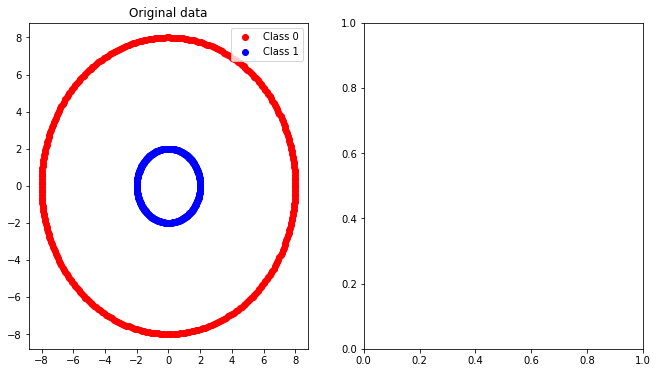

In [27]:
YKpcaLec, DKpcaLec = KpcaGaussianLecture(X,gamma)
print(YKpcaLec)
plotResults(X=X,Y=YKpcaLec,const=1,title='KPCA Lecture')

Now, test ICA.

**Question:** Use ICA with the different 4 scenarios and comment the results. When it works better than PCA ? Why ?

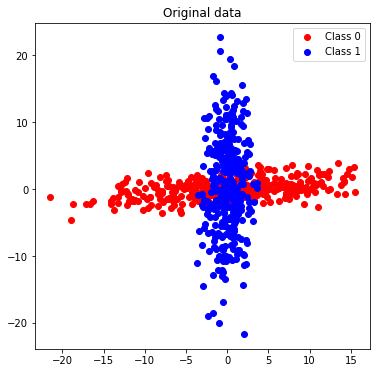

In [14]:
X0,X1,y = generate_scenario(scenario=3, n_samples0 = 350, n_samples1 = 350)
X=np.concatenate((X0,X1),axis=0)

plt.figure(figsize=(6, 6))
plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()
plt.show()

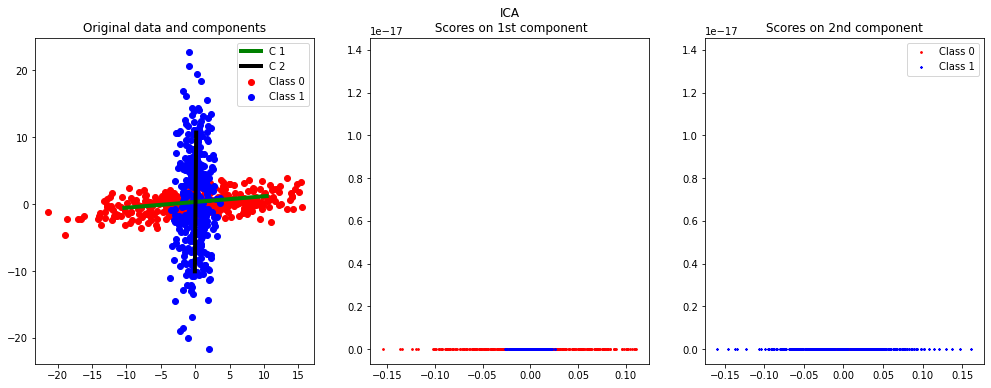

In [15]:
## ICA
ICA= FastICA(whiten=True, fun='exp', max_iter=20000, tol=0.00001, random_state=1)
Yica=ICA.fit_transform(X)
Aica=ICA.mixing_
plotResults(X=X,U=Aica,Y=Yica,const=0.01,title='ICA')

---

***Response :*** It works better in the third case because it identifies the two independent direction, what PCA can't do because they are not those who maximize the variance. 

---

Instead than using the scikit-learn implementation, implement one on your own !
Complete the code where you see **XXXXXXXXXXXXXX**

In [0]:
from scipy.cluster.vq import whiten

def FastICALecture(X,N_Iter=3000,tol=1e-5,plot_evolution=0):
    '''
    Inputs: 
                   X: is a [d x N] matrix. Every column is an observation 
                   and every row is a feature.       
    
                   (Optional) N_Iter: maximum number of iterations
    
                   (Optional) delta: convergence criteria threshold
    
                   (Optional) plot_evolution: plot evolution of error
                   
     Outputs:      
                   S: [d x N] matrix.  Each column is an independent component 
                   of the centred and whitened input data X              
                   
                   W: [d x d] matrix. It is the demixing matrix. S = W*Xcw 
    
    '''
    # Choose G among the Negentropy functions seen during the lecture
    # First derivative of G   
    def g(t):
        res = t*np.exp(-t**2/2)
        return res
    
    # Second derivative of G  
    def gp(t):
        res = (1-t**2)*np.exp(-t**2/2)
        return res
    
    # Size of X
    d,N=X.shape 
        
    # Center data
    Xc=X-np.mean(X,axis=0)
    
    # Whiten data
    Xcw=whiten(Xc)

    In=np.zeros(N).T
    
    # check if are whitened
    if np.sum(np.eye(d) - np.abs(np.cov(Xcw)))>1e-10:
        raise NameError('Your whitening transformation does not work...')
    
    # Initialize W
    W = ortho_group.rvs(d) # random orthogonal matrix 
    
    # delta evolution
    k = 0
    delta = np.inf # 1 - min(...)
    evolutionDelta=[]
    
    while delta > tol and k < N_Iter:
    
        k = k + 1
        W_old = np.copy(W)
        
        Wp = np.dot(g(np.dot(W_old,Xcw)),Xcw.T)-np.diag(gp(np.dot(np.dot(W_old,Xcw),In))*W_old)
        W = np.dot(np.dot(Wp,Wp.T)**(-0.5),Wp)
        if np.sum(np.eye(d)-np.abs(np.dot(W,W.T)))>1e-10:
            raise NameError('W should be an orthogonal matrix. Check the computations')
                 
        delta = 1-np.min(np.abs(np.diag(np.dot(W.T,W_old))))
        evolutionDelta.append(delta)
        
        if k==1 or k%100==0:
            print('Iteration ICA number ', k, ' out of ', N_Iter , ', delta = ', delta)
     
        
    if k==N_Iter:
        print('Maximum number of iterations reached ! delta = ', delta)
    else:
        print('Convergence achieved ( delta = ', delta, ') in ', k, ' iterations')

    # Independent components
    S = np.dot(W,X)
            
    if plot_evolution==1:
        plt.figure(figsize=(6, 6))
        plt.plot(range(k),evolutionDelta,'bx--', linewidth=4, markersize=12)  
        plt.title('Evolution of error - ICA')
        plt.show()
       
    return S,W

Test your own implementation

Iteration ICA number  1  out of  3000 , delta =  0.9301189025468207
Convergence achieved ( delta =  -5.861889230424519 ) in  2  iterations


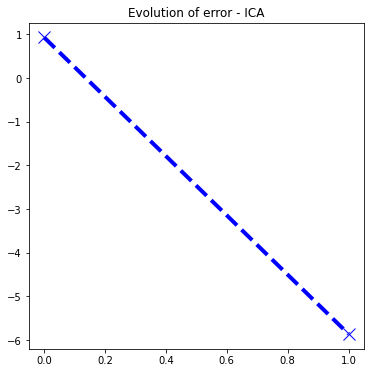

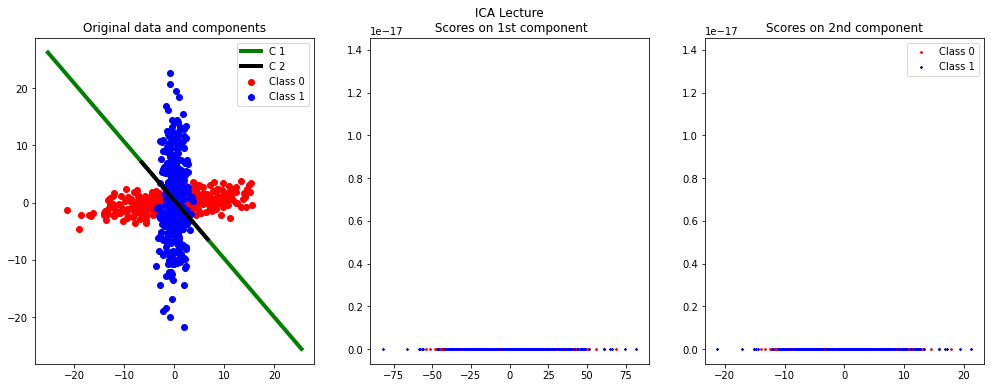

In [17]:
SicaLec,WicaLec = FastICALecture(X.T,N_Iter=3000,tol=1e-5,plot_evolution=1)
plotResults(X=X, U=WicaLec.T, Y=SicaLec.T, const=1, title='ICA Lecture')

With a different perspective, we could also use K-means. As before, we will use it on X and we will check whether it can well separate the two classes. 


**Question:** Does it work well in all scenarios ? Why ?

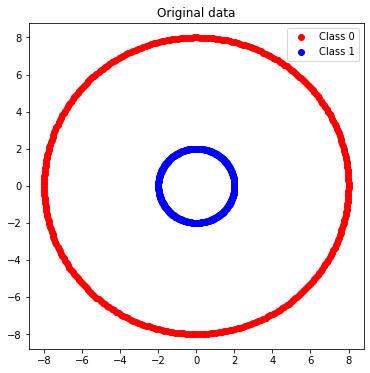

In [24]:
X0,X1,y = generate_scenario(scenario=4, n_samples0 = 350, n_samples1 = 350)
X=np.concatenate((X0,X1),axis=0)

plt.figure(figsize=(6, 6))
plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()
plt.show()

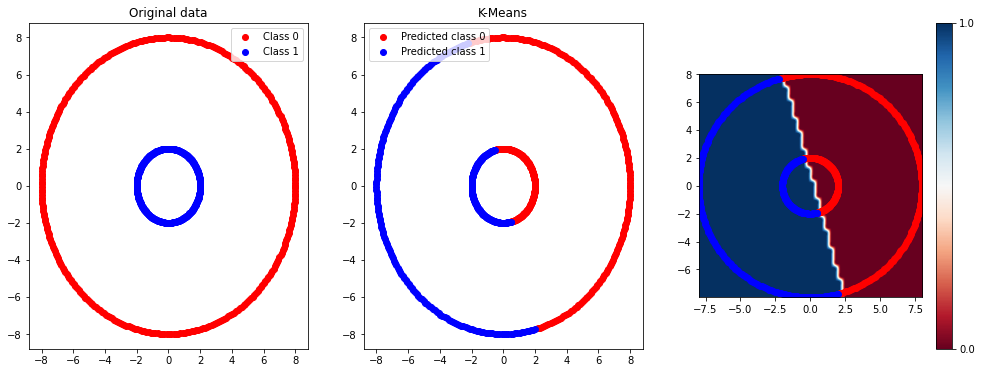

In [25]:
## K-means
kmeans=KMeans(n_clusters=2)
yKmeans=kmeans.fit_predict(X)

plt.figure(figsize=(17, 6))
plt.subplot(131)
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r', label='Class 0')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()

plt.subplot(132)
plt.scatter(X[np.where(yKmeans == 0)[0],0],X[np.where(yKmeans == 0)[0],1],c='r', label='Predicted class 0')
plt.scatter(X[np.where(yKmeans == 1)[0],0],X[np.where(yKmeans == 1)[0],1],c='b', label='Predicted class 1')
plt.title('K-Means')
plt.legend()

plt.subplot(133)
frontiere(kmeans, X, y, step=50)

plt.show()

--- 

***Response :*** K-means work uniquely in the first scenario. It works when the two cluster are clearly separable and compact. 
In the second and the third, there are points of each original cluster that are closer to the center of the other cluster, so they are misclassified. 
In the 4th scenario, the red cluster (class 0) is not compact, it contains points that are apart from each others.

---